<a href="https://colab.research.google.com/github/Marvaindrasari/Machine-learning-deep-learning-portofolio/blob/main/04_01_Fire_Marva_Indrasari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

Preparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `SC_HW1_bank_data.csv` sebelum tahap pemodelan :
1. Import Library
2. Input Dataset
3. Preprocessing
4. Train-Test Split

## Import Library

In [ ]:
import pandas as pd
import numpy as np

## Input Dataset

In [ ]:
#Membaca data dan memasukkannya ke dalam bentuk Pandas Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/SC_HW1_bank_data.csv')
df.head()

,RowNumber,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Jalankan code untuk mengecek nama kolom yang tersedia
df.columns

Index(['RowNumber', 'CustomerId', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#Hilangkan kolom yang dirasa tidak relevan dengan model (contoh: ID). None dapat diisi dengan nama-nama kolom yang akan digunakan.
#Contoh df = df[['X1','X2', 'Y']].copy()

#START CODE
df = df[['Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']].copy()
df.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geography        10000 non-null  object 
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [ ]:
#Lakukan One-Hot Encoder untuk data categorical, dengan fungsi pandas get_dummies

#START CODE
df_encoder = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first=True)
df_encoder

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
df_encoder.columns

Index(['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [ ]:
#Pisahkan mana X (feature) dengan Y,
#Y adalah kolom "Exited"

#START CODE
X = df_encoder.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
#Lakukan Scaler dan/atau Noermalisasi jika diperlukan
from sklearn.preprocessing import MinMaxScaler

#START CODE
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)

In [ ]:
#Ini digunakan jika dilakukan scaler/Normalisas. Jika tidak, code ini bisa dilewat dan diganti dengan code yang ada di dalam komen
X_transform = pd.DataFrame(X_transform, columns = X.columns)

#X_transform = X.copy()
X_transform

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.0,0.0,0.0
1,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0
2,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.0,0.0,0.0
3,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,0.0
4,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,0.0,1.0
9996,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,0.0,1.0
9997,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,0.0,0.0,0.0
9998,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0,0.0,1.0


## Train-Test Split

In [ ]:
#Split menjadi train dan test dengan test_size 25%
#Tidak perlu mengubah code ini

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,test_size = 0.25,random_state = 123)

# Modeling

## Model1

### Soal :
Jelaskan secara Singkat Model pertama yang digunakan!

####Random Forest
Random forest merupakan penggabungan dari beberapa pohon keputusan (decision tree). Cara kerja Random forest yaitu dengan menentukan root node, yaitu fitur yang memiliki peran besar terhadap label yang dihasilkan. Kemudian akan membentuk cabang dari fitur yang lain (selain fitur yang digunakan untuk root node) berupa parent dan child node dengan root node selalu sama.
Pada random forest menggunakan beberapa parameter yaitu:
1. n_estimator -> jumlah pohon keputusan yang dibangun dalam ensemble Random Forest.
2. max_depth -> mengotrol kedalaman max dari setiap pohon keputusan
3. min_samples_split -> jumlah minimum sampel yang diperlukan untuk membagi node dalam pohon
4. min_samples_leaf -> jumlah minimum sampel yang dibutuhkan untuk sebuah daun (leaf) dalam pohon
5. max_features -> jumlah fitur yang dipertimbangkan oleh setiap pohon saat mencari pemisah terbaik
6. bootstrap -> menentukan apakah setiap pohon akan dibangun dengan bootstrap atau tidak
7. obb_score -> mengukur kinerja model secara internal

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
params ={
    'n_estimators': [64, 100, 128, 200],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'oob_score': [True, False]
}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator= model1,
             param_grid= params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid.fit(X_train,y_train)
grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/li

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 128,
 'oob_score': True}

In [ ]:
#lakukan evaluasi dengan beberapa maetric di bawah ini
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

con_rf = confusion_matrix(y_test,y_pred)
rf = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1983
           1       0.78      0.45      0.57       517

    accuracy                           0.86      2500
   macro avg       0.83      0.71      0.75      2500
weighted avg       0.85      0.86      0.85      2500


[[1917   66]
 [ 282  235]]

0.8608


## Model2
### Soal :
Jelaskan secara Singkat Model ke-2 yang digunakan!

####Gradient Boosting Method
Gradient boosting method adalah salah satu boosting method yang bekerja dengan cara memanfaatkan model lemah dan dibentuk secara seri untuk membuat sebuah model ensemble yang lebih kuat.
Pada model gradient boosting dibawah ini menggunakan parameter:
1. n_estimator -> jumlah estimator yang akan dibangun dalam ensemble
2. max_depth -> kedalaman maksimum dari setiap estimator dalam ensemble
3. learning_rate -> mengontrol kontribusi estimator dalam model


In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier()
params = {
    'n_estimators': [50,100],
    'max_depth': [3,4,5],
    'learning_rate': [0.2, 0.1, 0.05, 0.01]
}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator= model2,
             param_grid= params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

con_gb = confusion_matrix(y_test,y_pred)
gb = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1983
           1       0.78      0.51      0.62       517

    accuracy                           0.87      2500
   macro avg       0.83      0.74      0.77      2500
weighted avg       0.86      0.87      0.86      2500


[[1909   74]
 [ 254  263]]

0.8688


## Model3
### Soal :
Jelaskan secara Singkat Model ke-3 yang digunakan!

####Support Vector Machine
Support Vector Machine adalah konsep machine learning yang memanfaatkan hyperplane dan perhitungan vector.
Pada model SVM yang digunakan dibawah menggunakan parameter:
1. C -> mengendalikan penalti terhadap kesalahan klasifikasi
2. kernel -> mengubah ruang fitur menjadi ruang dimensi yang lebih tinggi
3. gamma -> mengontrol bentuk kernel

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.svm import SVC
model3 = SVC()
params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': [0.1, 1, 'scale', 'auto']
}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator= model3,
             param_grid= params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid.fit(X_train,y_train)
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

con_sv = confusion_matrix(y_test,y_pred)
sv = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1983
           1       0.83      0.40      0.54       517

    accuracy                           0.86      2500
   macro avg       0.84      0.69      0.73      2500
weighted avg       0.85      0.86      0.84      2500


[[1940   43]
 [ 311  206]]

0.8584


## Tarik Kesimpulan Model Mana yang terbaik beserta alasannya

In [ ]:
print('Confussion matrix:')
print('Random Forest: \n{}'.format(con_rf))
print('TP and FN:', con_rf[0,0] + con_rf[1,1])
print('Gradient Boosting: \n{}'.format(con_gb))
print('TP and FN:', con_gb[0,0] + con_gb[1,1])
print('Support Vector Machine: \n{}'.format(con_sv))
print('TP and FN:', con_sv[0,0] + con_sv[1,1])

Confussion matrix:
Random Forest: 
[[1917   66]
 [ 282  235]]
TP and FN: 2152
Gradient Boosting: 
[[1909   74]
 [ 254  263]]
TP and FN: 2172
Support Vector Machine: 
[[1940   43]
 [ 311  206]]
TP and FN: 2146


Accuracy Score:
Random Forest: 0.8608
Gradient Boosting: 0.8688
Support Vector Machine: 0.8584


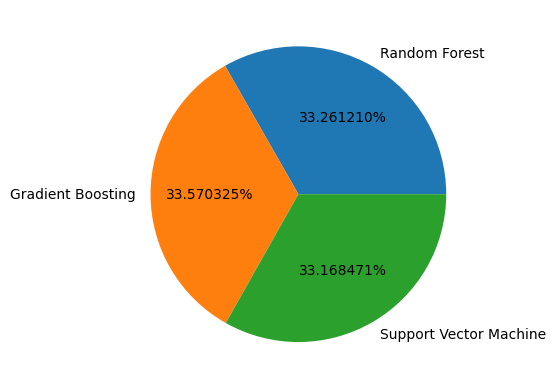

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

print('Accuracy Score:')
print('Random Forest: {}'.format(rf))
print('Gradient Boosting: {}'.format(gb))
print('Support Vector Machine: {}'.format(sv))

acc = [rf, gb, sv]
label = ['Random Forest', 'Gradient Boosting', 'Support Vector Machine']

plt.pie(
    acc,
    labels=label,
    autopct='%1f%%'
)

plt.show()





######Berdasarkan perhitungan diatas, dari ke-3 model yaitu: Random Forest, Gradient Boosting dan Support Vector Machine, dapat disimpulkan bahwa model terbaik yaitu Gradient Boosting karena memiliki nilai accuracy terbesar yaitu 0.8688 yang apabila dibandingkan dengan 2 model lain menduduki 33.59% serta memiliki nilai TP dan FN terbesar yaitu 2172. Nilai TP dan FN menunjukkan jumlah nilai prediksi yang tepat dengan nilai aktual, sehingga model yang memiliki nilai TP dan FN yang terbesar adalah model yang berhasil memprediksi dengan tepat terbanyak. Sementara Model terbaik kedua adalah Random Forest dan terakhir adalah SVM.